In [344]:
from matplotlib import pyplot as plt #to get plotting working

# Pandas

This morning: the Python library `pandas`.

(`pandas` comes from the phrase "panel data", a finance term that's historically important to the development of pandas but isn't very relevant anymore. Now you know.)

Pandas is a library for representing, manipulating, and querying in-memory tabular data. It's like **fancy Excel**.

The plan for this morning:

* `numpy` refresher
  * single type
  * multi-dimensional
  * slice indexing
  * vectorized operations
  * broadcasting
* `pandas` intro
  * `Series` class
  * label/position indexing
  * `DataFrame` class
  * Getting, setting from DF
  * Querying dataframe
  * Dealing with missing values
  * Combining DFs
  * Categoral data grab bag
* Plotting
  * With time left over; this is the afternoon topic

After this lesson you should be able to:

* Numpy:
  * Create and exit a numpy array
  * Avoid loops with vectorized operations
* Pandas:
  * Create a dataframe from scratch
  * Create a DF using a `load_` function
  * Inspect a DF
  * Query/filter a DF
  * Make a simple plot

## `numpy` refresher

`numpy` ("Numerical Python") is an efficient library for working with n-dimensional arrays. `numpy` is the basis of `pandas`, and its indexing idioms (eg slice tuples, boolean masks) are common in `pandas`.

We covered `numpy` in week 0 and will cover it again on linear algebra day. But it's complicated and useful, so we'll cover it again here.



In [1]:
import numpy as np  #extremely standard

### It's like a list

Recall that a standard Python list can contain an ordered series of objects:

In [2]:
lst = [1, 2.2, "foo", lambda x:x*2]
print( lst )

[1, 2.2, 'foo', <function <lambda> at 0x107a73268>]


Numpy arrays are the same; they contain an ordered series of values: 

In [3]:
ary = np.array([1, 2, 3, 3])
ary

array([1, 2, 3, 3])

### But it can only contain one type

The primary difference is that every value in a numpy array must be the same type. This is the array's **dtype**.

In [4]:
ary.dtype

dtype('int64')

**NOTE**: This is the type of the array's **contents**, not the **array itself**, which is still just:

In [5]:
type( ary )

numpy.ndarray

An array is **mutable**, and can be accessed and edited with subscript notation:

In [6]:
ary[0] = 42
ary

array([42,  2,  3,  3])

However, you may only insert values into the array that conform to the array's type:

In [7]:
ary[0] = 32.6 #decimal number can be coerced into an integer
ary

array([32,  2,  3,  3])

In [8]:
ary[0] = "foo" #the string 'foo' cannot

ValueError: invalid literal for int() with base 10: 'foo'

### Arrays of objects

If numpy arrays can only contain a single type of value, will this work?

In [9]:
ary = np.array( [1, 2.2, "foo", lambda x:x*2] )

Confusingly, it does. In fact, the array **still** only contains one type:

In [10]:
ary

array([1, 2.2, 'foo', <function <lambda> at 0x107a732f0>], dtype=object)

In [11]:
ary.dtype

dtype('O')

I mention this for two reasons.
1. Python won't complain if you don't use `np.array` right.
2. If an `ndarray` contains mixed types, you can tell because ```dtype=object```.

## Has a *shape* instead of a *length*

A Python list has a length:

In [12]:
lst = [1,2,3]
len(lst)

3

`numpy` arrays are more accurately described by a **shape**.

In [13]:
np.array([1,2,3]).shape

(3,)

Why the parentheses and comma? The shape is a **tuple**, with a length for each **dimension**. In this case the array has one dimension, so the tuple has length one.

In normal Python if we wanted to describe a two-dimensional numerical array (ie, a matrix), we could do:

In [14]:
A = [[1,2],
     [3,4]]

This is fine. But it's not a multi-dimensional list - it a single-dimensional list of single-dimensional lists. Consequently it's accessed like:

In [15]:
A[0][1] #first row, second column

2

Alternatively in `numpy`:

In [16]:
A = np.array([[1,2],
              [3,4]])

This is not a list of lists - it's a single multi-dimensional array, and its items can be accessed with a single coordinate instead of picking it apart into its component rows:

In [17]:
A[0,1] #first row, second column

2

In [18]:
A.shape

(2, 2)

### Slice indexing for great power

Once you can index by a tuple, but it doesn't have to be a tuple of numbers - it can be a tuple of **slice** objects.

In [19]:
A = np.array([[1,2, 3, 4 ],
              [5,6, 7, 8 ],
              [9,10,11,12]])

In [20]:
A[1,2] # second row, third column, like normal

7

In [21]:
A[0, :] # just the first row

array([1, 2, 3, 4])

In [22]:
A[:, 1] # just the second column

array([ 2,  6, 10])

In [23]:
A[0:2, :] # the first and second row

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [24]:
A[ :, 1:3 ] # the second and third column

array([[ 2,  3],
       [ 6,  7],
       [10, 11]])

In [25]:
A[0:2, 1:3] # slice out a rectangle from within the matrix

array([[2, 3],
       [6, 7]])

In [26]:
A[:, ::2] #every other column

array([[ 1,  3],
       [ 5,  7],
       [ 9, 11]])

In [27]:
A[::-1] # reverse the rows

array([[ 9, 10, 11, 12],
       [ 5,  6,  7,  8],
       [ 1,  2,  3,  4]])

In [28]:
A[:, ::-1] # reverse the columns

array([[ 4,  3,  2,  1],
       [ 8,  7,  6,  5],
       [12, 11, 10,  9]])

### Vectorized operations

Generally speaking, operations on `array` objects are **vectorized**, meaning that the array $C$ resultant from $C=op(A,B)$ will have members $c_{i,j} = op( a_{i,j}, b_{i,j} )$. For example:

In [29]:
A = np.array([1,2,3,4,5])
B = np.array([1,1,2,2,3])

A+B # look ma, no loops

array([2, 3, 5, 6, 8])

This works on all arithmetic operators, and a number of more exotic operators (eg the binary twos compliment operator `^`). Note boolean operations `and`, `or`, and `not` must use the operators `&`, `|`, and `~`.

In [30]:
True and False  # this works just fine

False

In [31]:
A = np.array([True, True, False, False])
B = np.array([True, False, True, False])

A and B # but this does not, though it seems like it should

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [32]:
A & B # you have to use this

array([ True, False, False, False])

### Broadcasting

In many cases, vectorized operations work between arrays and scalars: 

In [33]:
A = np.array([1,2,3,4])
3*A

array([ 3,  6,  9, 12])

And between arrays of different dimensionality

In [34]:
A = np.array([[1,2],
              [3,4]])
b = np.array([5,6])
A+b

array([[ 6,  8],
       [ 8, 10]])

This is possible due to **broadcasting**, where `numpy` automatically copies the lower-dimensional operand the trailing dimension so that it matches the higher-dimensional operand.

For example, if we have

```
[1 2] + [5 6]
[3 4]
```

`numpy` will broadcast ```[5 6]``` along the 2st dimension (ie, columns), to make:

```
[1 2] + [5 6]
[3 4]   [5 6]
```

and then proceeds with a pairwise operation.

### It's all in `pandas`, because elegance

All of these idioms are shared by numpy and pandas:

* single-type data structures
* slice indexing
* vectorize operations
* broadcasting

In fact, these schemes are the backbone of reducing complex algorithms and procedures into simple statements. For example:

In [41]:
def matmul(A,B):
    n = A.shape[0]
    m = B.shape[1]
    
    C = np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            C[i,j] = (A[i,:]*B[:,j]).sum()
            
    return C

A = np.array([[1,2,3],
              [4,5,6]])
B = np.array([[3,4],
              [3,4],
              [4,5]])

matmul(A, B)

array([[21., 27.],
       [51., 66.]])

In [108]:
# or even
(np.expand_dims(A,0)*np.expand_dims(B,1).T).sum(axis=2).T #LOOK MA NO LOOPS

array([[21, 27],
       [51, 66]])

Admission: I wrote that last statement in a fugue state and I don't really understand how it works. But: **elegance**.

**Bonus if there's time**: what's the big-O runtime complexity of these implementations?

## Pandas

In [129]:
import pandas as pd   # very standard

### Series: the building block

* 1-d numpy array **with an index**

In [130]:
series = pd.Series([5775,373,7,42,np.nan,33])
print(series)
print("\n")
print(series.shape)

0    5775.0
1     373.0
2       7.0
3      42.0
4       NaN
5      33.0
dtype: float64


(6,)


A series is a thin wrapper around a `numpy` array, which you can grab with `.values`:

In [131]:
series.values

array([5775.,  373.,    7.,   42.,   nan,   33.])

In [132]:
series.values.dtype

dtype('float64')

### Series operations
Just like numpy arrays, `Series` instances have aggregate operations.

In [133]:
series.sum(), series.mean(), series.min(), series.max(), series.std()

(6230.0, 1246.0, 7.0, 5775.0, 2536.2411162978965)

### The index

Whereas most ordered collections are accessed with `[]` syntax, Series provides two ways to access its contents:

#### Get the item at **position**, using `iloc` 

In [134]:
series.iloc[1]

373.0

#### Get item with **label**, using `loc`

In [135]:
series.loc[1]

373.0

By default, the index is just `range(n)`. For a better demo, let's specify the index:

In [136]:
series = pd.Series(data=[5775,373,7,42,np.nan,33],
                   index=["A", "B", "C", "D", "E", "F"]) # index doesn't have to be ints

In [137]:
series

A    5775.0
B     373.0
C       7.0
D      42.0
E       NaN
F      33.0
dtype: float64

In [138]:
series.iloc[0] # grab by position

5775.0

In [139]:
series.loc["A"] #grab by label

5775.0

In [140]:
series["A"] #with Series, [] acts like .loc[]

5775.0

Indexes work like a dictionary key, allowing fast lookups of the data associated with the index.

Indexes can also be exploited for fast group-bys, merges, time-series operations and lots more.

#### Indexes for time series data

This is magical special behavior, but it comes in handy **a lot**.

In [142]:

#Datetime index
dt_index = pd.date_range('2015-1-1', 
                        '2015-11-1', 
                        freq='m')
dt_series = pd.Series([1,3,6,2,9,4,2,1,2,3], 
                      index = dt_index)
dt_series

2015-01-31    1
2015-02-28    3
2015-03-31    6
2015-04-30    2
2015-05-31    9
2015-06-30    4
2015-07-31    2
2015-08-31    1
2015-09-30    2
2015-10-31    3
Freq: M, dtype: int64

#### Indexes for merging Series objects

In [145]:
A = pd.Series([1,2,3], index=["A", "B", "C"])
B = pd.Series([5,6,6], index=["A", "C", "D"])

In [148]:
A

A    1
B    2
C    3
dtype: int64

In [149]:
B

A    5
C    6
D    6
dtype: int64

In [150]:
A+B

A    6.0
B    NaN
C    9.0
D    NaN
dtype: float64

## Series -> DataFrame

* Set of Pandas Series that **share the same index**.

In [168]:
# make a bunch of series objects
A = pd.Series([1, 4], index=['foo', 'bar'])
B = pd.Series([2.2, 5.2], index=['foo', 'bar'])
C = pd.Series(["a", "b"], index=['foo', 'bar'])

In [169]:
A 

foo    1
bar    4
dtype: int64

In [170]:
C #and so forth

foo    a
bar    b
dtype: object

In [171]:
# glue them all together, each with a name

df = pd.DataFrame({'a':A, 'b':B, 'c':C})
df

,a,b,c
foo,1,2.2,a
bar,4,5.2,b


There's a bewildering number of ways to build a DataFrame

In [182]:
# build from a list of rows
pd.DataFrame(  [[1, 2.2, "a"], [4, 5.2, "b"]], 
                 columns=['a', 'b', 'c'], 
                 index=['foo', 'bar'])

,a,b,c
foo,1,2.2,a
bar,4,5.2,b


In [195]:
# build from list of dictionaries
pd.DataFrame( [{'a':1, 'b':2.2, 'c':'a'},
               {'a':4, 'b':5.2, 'c':'b'}], index=["foo","bar"] )

,a,b,c
foo,1,2.2,a
bar,4,5.2,b


In [196]:
# build from dictionary of columns
pd.DataFrame( {'a':[1,4], 'b':[2.2, 5.2], 'c':['a', 'b']}, index=["foo","bar"] )

,a,b,c
foo,1,2.2,a
bar,4,5.2,b


### DataFrame -> Series

In [202]:
#example data
df = pd.DataFrame(np.random.randn(10, 5), index=dt_index, columns=[x for x in 'abcde'])
df

,a,b,c,d,e
2015-01-31,-0.534984,0.579751,0.471457,2.657771,0.142726
2015-02-28,0.291779,0.342042,-0.396980,1.163000,-1.724698
2015-03-31,0.102095,-0.403743,0.940021,-0.835870,2.471600
2015-04-30,2.210217,-0.612161,-1.685554,0.587798,-0.060626
2015-05-31,-1.046593,0.372371,1.318075,-0.817027,-0.334751
2015-06-30,-1.195353,-1.716750,-2.259716,2.176350,-0.945767
2015-07-31,-1.765847,-1.010928,-1.528238,-1.140234,-1.631938
2015-08-31,0.231591,0.095312,-0.336389,0.886664,0.251508
2015-09-30,0.840796,-1.622515,-2.254088,-0.906169,-1.570848
2015-10-31,1.646891,-0.296475,-0.744069,-0.502061,-1.596221


#### Getting columns

Select a DataFrame's constituent Series columns using `[]`.

In [209]:
df["a"]

2015-01-31   -0.534984
2015-02-28    0.291779
2015-03-31    0.102095
2015-04-30    2.210217
2015-05-31   -1.046593
2015-06-30   -1.195353
2015-07-31   -1.765847
2015-08-31    0.231591
2015-09-30    0.840796
2015-10-31    1.646891
Freq: M, Name: a, dtype: float64

Dot notation works, unless the column name has a space. In general stick to `[]`.

In [210]:
df.a

2015-01-31   -0.534984
2015-02-28    0.291779
2015-03-31    0.102095
2015-04-30    2.210217
2015-05-31   -1.046593
2015-06-30   -1.195353
2015-07-31   -1.765847
2015-08-31    0.231591
2015-09-30    0.840796
2015-10-31    1.646891
Freq: M, Name: a, dtype: float64

A column is a Series instance:

In [216]:
type(df["a"])

pandas.core.series.Series

The index of column series is the same as the dataframe:

In [217]:
df["a"].index

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31'],
              dtype='datetime64[ns]', freq='M')

The indices of all columns are the same:

In [219]:
df["d"].index == df["a"].index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

#### Getting rows

In [214]:
# by label
df.loc["2015-01-31"]

a   -0.534984
b    0.579751
c    0.471457
d    2.657771
e    0.142726
Name: 2015-01-31 00:00:00, dtype: float64

In [215]:
# by position
df.iloc[0]

a   -0.534984
b    0.579751
c    0.471457
d    2.657771
e    0.142726
Name: 2015-01-31 00:00:00, dtype: float64

A row is **also** a Series instance:

In [220]:
type( df.iloc[0] )

pandas.core.series.Series

The index of all rows is the column names.

In [222]:
df.iloc[0].index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

#### Select multiple rows

Use a list of column names.

In [223]:
df[["a","b"]]

,a,b
2015-01-31,-0.534984,0.579751
2015-02-28,0.291779,0.342042
2015-03-31,0.102095,-0.403743
2015-04-30,2.210217,-0.612161
2015-05-31,-1.046593,0.372371
2015-06-30,-1.195353,-1.716750
2015-07-31,-1.765847,-1.010928
2015-08-31,0.231591,0.095312
2015-09-30,0.840796,-1.622515
2015-10-31,1.646891,-0.296475


## Column operations
Just like numpy, operations are broadcast to every element of a column

In [224]:
df['a'] + df['b']

2015-01-31    0.044768
2015-02-28    0.633821
2015-03-31   -0.301648
2015-04-30    1.598056
2015-05-31   -0.674222
2015-06-30   -2.912103
2015-07-31   -2.776775
2015-08-31    0.326902
2015-09-30   -0.781719
2015-10-31    1.350416
Freq: M, dtype: float64

## Adding a new column
It's just like setting by key in a dictionary

In [225]:
df['h'] = abs(df['a'])**df['b']

In [226]:
df

,a,b,c,d,e,h
2015-01-31,-0.534984,0.579751,0.471457,2.657771,0.142726,0.695833
2015-02-28,0.291779,0.342042,-0.396980,1.163000,-1.724698,0.656185
2015-03-31,0.102095,-0.403743,0.940021,-0.835870,2.471600,2.512513
2015-04-30,2.210217,-0.612161,-1.685554,0.587798,-0.060626,0.615390
2015-05-31,-1.046593,0.372371,1.318075,-0.817027,-0.334751,1.017102
2015-06-30,-1.195353,-1.716750,-2.259716,2.176350,-0.945767,0.736137
2015-07-31,-1.765847,-1.010928,-1.528238,-1.140234,-1.631938,0.562792
2015-08-31,0.231591,0.095312,-0.336389,0.886664,0.251508,0.869862
2015-09-30,0.840796,-1.622515,-2.254088,-0.906169,-1.570848,1.324924
2015-10-31,1.646891,-0.296475,-0.744069,-0.502061,-1.596221,0.862510


## Advanced selection

### .loc 
select by row label (index), and column label

In [227]:
df.loc['2015-05-31':'2015-08-31', 'c':'e'] #Ranges by label.

,c,d,e
2015-05-31,1.318075,-0.817027,-0.334751
2015-06-30,-2.259716,2.176350,-0.945767
2015-07-31,-1.528238,-1.140234,-1.631938
2015-08-31,-0.336389,0.886664,0.251508


In [228]:
df.loc['2015-05-31':'2015-08-31', 'c':'e'] = 2.7

In [229]:
df

,a,b,c,d,e,h
2015-01-31,-0.534984,0.579751,0.471457,2.657771,0.142726,0.695833
2015-02-28,0.291779,0.342042,-0.396980,1.163000,-1.724698,0.656185
2015-03-31,0.102095,-0.403743,0.940021,-0.835870,2.471600,2.512513
2015-04-30,2.210217,-0.612161,-1.685554,0.587798,-0.060626,0.615390
2015-05-31,-1.046593,0.372371,2.700000,2.700000,2.700000,1.017102
2015-06-30,-1.195353,-1.716750,2.700000,2.700000,2.700000,0.736137
2015-07-31,-1.765847,-1.010928,2.700000,2.700000,2.700000,0.562792
2015-08-31,0.231591,0.095312,2.700000,2.700000,2.700000,0.869862
2015-09-30,0.840796,-1.622515,-2.254088,-0.906169,-1.570848,1.324924
2015-10-31,1.646891,-0.296475,-0.744069,-0.502061,-1.596221,0.862510


### .iloc
select by __positional__ index

In [230]:
df.iloc[2:4,2:5] #Ranges by number.

,c,d,e
2015-03-31,0.940021,-0.835870,2.471600
2015-04-30,-1.685554,0.587798,-0.060626


### .ix (deprecated)
select by either label or position index
(deprecated because it led to too much ambiguity)

# DO NOT USE .ix 
It is here so you can recognize it and scold others for using it.
  
  
--------------------------------------------------------------------------------------------     
        
      
      
# Multiple Indices

Start with a df with a single date index

In [232]:
dt_index = pd.date_range('2015-1-1', 
                        '2017-7-1', 
                        freq='m')
df = pd.DataFrame(np.random.randn(30,5), index=dt_index)
df

,0,1,2,3,4
2015-01-31,0.618457,0.976813,-0.143638,-0.380347,-0.655352
2015-02-28,0.791662,1.066877,-0.457265,0.669506,-0.687026
2015-03-31,-0.251672,0.486378,0.831907,0.300127,-0.876817
2015-04-30,-0.808394,-0.213850,-1.135353,1.219403,0.615375
2015-05-31,-1.752261,-0.406975,0.117304,0.398717,0.874999
2015-06-30,0.514546,0.504895,-0.890812,0.855788,0.715268
2015-07-31,1.396478,0.855402,0.521629,1.183063,-1.022197
2015-08-31,-0.964743,0.305131,1.680751,0.160833,-0.909193
2015-09-30,-1.256373,1.284309,0.877986,0.084957,0.329734
2015-10-31,1.453810,-1.227957,-0.478844,-0.472283,1.132067


Let's add new column of states

In [233]:
df['state'] = ['Alabama', 'Alaska' , 'Arizona'] * 10
df.head()

,0,1,2,3,4,state
2015-01-31,0.618457,0.976813,-0.143638,-0.380347,-0.655352,Alabama
2015-02-28,0.791662,1.066877,-0.457265,0.669506,-0.687026,Alaska
2015-03-31,-0.251672,0.486378,0.831907,0.300127,-0.876817,Arizona
2015-04-30,-0.808394,-0.213850,-1.135353,1.219403,0.615375,Alabama
2015-05-31,-1.752261,-0.406975,0.117304,0.398717,0.874999,Alaska


`reset_index` shifts the index to a column, then gives the rows a boring old positional index

In [234]:
df = df.reset_index()

In [235]:
df

,index,0,1,2,3,4,state
0,2015-01-31,0.618457,0.976813,-0.143638,-0.380347,-0.655352,Alabama
1,2015-02-28,0.791662,1.066877,-0.457265,0.669506,-0.687026,Alaska
2,2015-03-31,-0.251672,0.486378,0.831907,0.300127,-0.876817,Arizona
3,2015-04-30,-0.808394,-0.213850,-1.135353,1.219403,0.615375,Alabama
4,2015-05-31,-1.752261,-0.406975,0.117304,0.398717,0.874999,Alaska
5,2015-06-30,0.514546,0.504895,-0.890812,0.855788,0.715268,Arizona
6,2015-07-31,1.396478,0.855402,0.521629,1.183063,-1.022197,Alabama
7,2015-08-31,-0.964743,0.305131,1.680751,0.160833,-0.909193,Alaska
8,2015-09-30,-1.256373,1.284309,0.877986,0.084957,0.329734,Arizona
9,2015-10-31,1.453810,-1.227957,-0.478844,-0.472283,1.132067,Alabama


`.set_index` sets columns to indices

In [236]:
df = df.set_index(['state', 'index'])
df.head()

,,0,1,2,3,4
state,index,,,,,
Alabama,2015-01-31,0.618457,0.976813,-0.143638,-0.380347,-0.655352
Alaska,2015-02-28,0.791662,1.066877,-0.457265,0.669506,-0.687026
Arizona,2015-03-31,-0.251672,0.486378,0.831907,0.300127,-0.876817
Alabama,2015-04-30,-0.808394,-0.213850,-1.135353,1.219403,0.615375
Alaska,2015-05-31,-1.752261,-0.406975,0.117304,0.398717,0.874999


In [237]:
df.loc['Alabama'].head()

,0,1,2,3,4
index,,,,,
2015-01-31,0.618457,0.976813,-0.143638,-0.380347,-0.655352
2015-04-30,-0.808394,-0.213850,-1.135353,1.219403,0.615375
2015-07-31,1.396478,0.855402,0.521629,1.183063,-1.022197
2015-10-31,1.453810,-1.227957,-0.478844,-0.472283,1.132067
2016-01-31,-1.077776,0.523009,0.869766,0.694638,0.770396


In [238]:
#df.loc['2015-01-31'] #Doesn't work.

In [239]:
df.loc[('Alabama', '2015-01-31')] #Can do this.

0    0.618457
1    0.976813
2   -0.143638
3   -0.380347
4   -0.655352
Name: (Alabama, 2015-01-31 00:00:00), dtype: float64

# Loading data from a file

`pandas` has lots of data-reading functions!

In [245]:
[x for x in dir(pd) if x.startswith("read_")]

['read_clipboard',
 'read_csv',
 'read_excel',
 'read_feather',
 'read_fwf',
 'read_gbq',
 'read_hdf',
 'read_html',
 'read_json',
 'read_msgpack',
 'read_parquet',
 'read_pickle',
 'read_sas',
 'read_sql',
 'read_sql_query',
 'read_sql_table',
 'read_stata',
 'read_table']

The one you'll use the most is `.read_csv`. It takes a filename **or** a URL of a CSV **or** a compressed file containing a CSV.

In [248]:
fn = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
#fn = 'data/winequality-red.csv'

df = pd.read_csv(fn, delimiter=';')

df.head()  #Display the first x rows (default is 5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [250]:
df.shape #told you pandas uses numpy idioms

(1599, 12)

In [251]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [253]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [254]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


# Filtering (i.e., row selecting or boolean indexing)

In [255]:
df['chlorides']

0       0.076
1       0.098
2       0.092
3       0.075
4       0.076
5       0.075
6       0.069
7       0.065
8       0.073
9       0.071
10      0.097
11      0.071
12      0.089
13      0.114
14      0.176
15      0.170
16      0.092
17      0.368
18      0.086
19      0.341
20      0.077
21      0.082
22      0.106
23      0.084
24      0.085
25      0.080
26      0.080
27      0.106
28      0.080
29      0.082
        ...  
1569    0.056
1570    0.230
1571    0.038
1572    0.069
1573    0.075
1574    0.074
1575    0.060
1576    0.081
1577    0.076
1578    0.118
1579    0.053
1580    0.068
1581    0.053
1582    0.053
1583    0.074
1584    0.061
1585    0.066
1586    0.065
1587    0.066
1588    0.068
1589    0.073
1590    0.077
1591    0.089
1592    0.076
1593    0.068
1594    0.090
1595    0.062
1596    0.076
1597    0.075
1598    0.067
Name: chlorides, Length: 1599, dtype: float64

In [257]:
df['chlorides'] <= 0.08  #vectorized operation, like in numpy

0        True
1       False
2       False
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10      False
11       True
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20       True
21      False
22      False
23      False
24      False
25       True
26       True
27      False
28       True
29      False
        ...  
1569     True
1570    False
1571     True
1572     True
1573     True
1574     True
1575     True
1576    False
1577     True
1578    False
1579     True
1580     True
1581     True
1582     True
1583     True
1584     True
1585     True
1586     True
1587     True
1588     True
1589     True
1590     True
1591    False
1592     True
1593     True
1594    False
1595     True
1596     True
1597     True
1598     True
Name: chlorides, Length: 1599, dtype: bool

In [258]:
mask = df['chlorides'] <= 0.08 
mask.head()

0     True
1    False
2    False
3     True
4     True
Name: chlorides, dtype: bool

In [259]:
type(mask)

pandas.core.series.Series

You can use a boolean series to "mask" a dataframe / series, returning only those rows where the mask is `True`

In [260]:
df[mask]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
20,8.9,0.220,0.48,1.8,0.077,29.0,60.0,0.99680,3.39,0.53,9.4,6


In [261]:
# Okay, this is cool. What if I wanted a slightly more complicated query...
df[(df['chlorides'] >= 0.04) & (df['chlorides'] < 0.08)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
20,8.9,0.220,0.48,1.8,0.077,29.0,60.0,0.99680,3.39,0.53,9.4,6


In [262]:
df2 = df[(df['chlorides'] >= 0.04) & (df['chlorides'] < 0.08)][['pH','fixed acidity']]

In [263]:
df2.head()

,pH,fixed acidity
0,3.51,7.4
3,3.16,11.2
4,3.51,7.4
5,3.51,7.4
6,3.30,7.9


In [264]:
df2.sort_values('pH').reset_index().head()

,index,pH,fixed acidity
0,544,2.86,14.3
1,440,2.88,12.6
2,1017,2.89,8.0
3,1018,2.89,8.0
4,657,2.92,12.0


In [265]:
df2.sort_values('pH').reset_index(drop=True).head()

,pH,fixed acidity
0,2.86,14.3
1,2.88,12.6
2,2.89,8.0
3,2.89,8.0
4,2.92,12.0


# Groupby

In [266]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [267]:
g = df.groupby('quality') # Note that this returns back to us a groupby object. It doesn't actually 
                      # return to us anything useful until we perform some aggregation on it. 
g

In [268]:
g.max()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,11.6,1.580,0.66,5.7,0.267,34.0,49.0,1.00080,3.63,0.86,11.0
4,12.5,1.130,1.00,12.9,0.610,41.0,119.0,1.00100,3.90,2.00,13.1
5,15.9,1.330,0.79,15.5,0.611,68.0,155.0,1.00315,3.74,1.98,14.9
6,14.3,1.040,0.78,15.4,0.415,72.0,165.0,1.00369,4.01,1.95,14.0
7,15.6,0.915,0.76,8.9,0.358,54.0,289.0,1.00320,3.78,1.36,14.0
8,12.6,0.850,0.72,6.4,0.086,42.0,88.0,0.99880,3.72,1.10,14.0


In [272]:
g["fixed acidity"].max() # you won't be blamed

quality
3    11.6
4    12.5
5    15.9
6    14.3
7    15.6
8    12.6
Name: fixed acidity, dtype: float64

In [273]:
g.max()["fixed acidity"] # for finding this all confusing

quality
3    11.6
4    12.5
5    15.9
6    14.3
7    15.6
8    12.6
Name: fixed acidity, dtype: float64

In [279]:
# Note we can also group by multilple columns by passing them in in a list. It will group by 
# the first column passed in first, and then the second after that (i.e. it will group by 
# the second within the group by of the first). 
df2 = df.groupby(['pH', 'quality']).size()

df2

pH    quality
2.74  4          1
2.86  6          1
2.87  6          1
2.88  5          1
      8          1
2.89  5          2
      6          2
2.90  6          1
2.92  5          3
      7          1
2.93  5          1
      6          2
2.94  5          2
      6          2
2.95  7          1
2.98  5          2
      6          1
      7          1
      8          1
2.99  5          2
3.00  5          4
      6          2
3.01  5          1
      6          1
      7          3
3.02  5          3
      6          1
      7          4
3.03  5          4
      6          2
                ..
3.61  5          3
      6          5
3.62  4          1
      5          2
      6          1
3.63  3          1
      5          2
3.66  4          1
      5          2
      6          1
3.67  5          2
      6          1
3.68  5          2
      6          2
      7          1
3.69  5          2
      6          2
3.70  6          1
3.71  6          1
      7          3
3.72  5          

# Remove columns

In [280]:
# add a computed column

df['pct_free_sulf'] = df['free sulfur dioxide'] / df['total sulfur dioxide']

In [282]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,pct_free_sulf
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.323529
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.373134
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.277778
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.283333
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.323529


In [283]:
df.drop('pct_free_sulf', axis = 1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [284]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'pct_free_sulf'],
      dtype='object')

Uh oh what's going on it's still there.

# Managing Missing Values
* http://pandas.pydata.org/pandas-docs/stable/missing_data.html

In [285]:
data = [[1, 2,     3], 
        [4, np.nan, 6]]

miss_val_df = pd.DataFrame( data, 
    columns=['a', 'b', 'c'], 
    index  =['foo', 'bar'])
miss_val_df

,a,b,c
foo,1,2.0,3
bar,4,NaN,6


In [286]:
miss_val_df.fillna(0)

,a,b,c
foo,1,2.0,3
bar,4,0.0,6


In [287]:
miss_val_df #still the same, what's up

,a,b,c
foo,1,2.0,3
bar,4,NaN,6


In [288]:
# IF YOU WANT THE CHANGE TO HAPPEN INPLACE YOU MUST SPECIFY:
miss_val_df.fillna(0,inplace=True)
miss_val_df

,a,b,c
foo,1,2.0,3
bar,4,0.0,6


## Dropping null values

In [289]:
data = [[1, 2,     3], 
        [4, np.nan, 6]]

miss_val_df = pd.DataFrame( data, 
    columns=['a', 'b', 'c'], 
    index  =['foo', 'bar'])
miss_val_df

,a,b,c
foo,1,2.0,3
bar,4,NaN,6


In [291]:
miss_val_df.dropna() #not in place

,a,b,c
foo,1,2.0,3


# Merge 
* http://pandas.pydata.org/pandas-docs/stable/merging.html

We can join DataFrames in a similar way that we join tables to SQL.  In fact, left, right, outer, and inner joins work the same way here.

In [292]:
merge1 = pd.DataFrame(
    [[1, 2, 3], [4, 3, 6]], 
    columns=['a', 'b', 'c'])

merge2 = pd.DataFrame(
    [[1, 2, 3], [4, 3, 6]], 
    columns=['z', 'b', 'y'])

merge1

,a,b,c
0,1,2,3
1,4,3,6


In [293]:
merge2

,z,b,y
0,1,2,3
1,4,3,6


In [294]:
merged_df = merge1.merge(merge2, how='inner')

In [295]:
merged_df

,a,b,c,z,y
0,1,2,3,1,3
1,4,3,6,4,6


# Concatenating
* adding *rows*
* see also: df.append()

In [299]:
df1 = pd.DataFrame(
    {'alpha': range(5), 'beta': range(5), 'gamma': range(5)})
df2 = pd.DataFrame(
    {'alpha': range(5), 'beta': range(5), 'delta': range(5)},
    index=range(5, 10))

In [300]:
df1

,alpha,beta,gamma
0,0,0,0
1,1,1,1
2,2,2,2
3,3,3,3
4,4,4,4


In [301]:
df2

,alpha,beta,delta
5,0,0,0
6,1,1,1
7,2,2,2
8,3,3,3
9,4,4,4


In [303]:
#Vertically
pd.concat([df1, df2], axis=0, sort=False)

,alpha,beta,gamma,delta
0,0,0,0.0,NaN
1,1,1,1.0,NaN
2,2,2,2.0,NaN
3,3,3,3.0,NaN
4,4,4,4.0,NaN
5,0,0,NaN,0.0
6,1,1,NaN,1.0
7,2,2,NaN,2.0
8,3,3,NaN,3.0
9,4,4,NaN,4.0


In [304]:
pd.concat([df1, df2], join='outer', axis=1)

,alpha,beta,gamma,alpha,beta,delta
0,0.0,0.0,0.0,NaN,NaN,NaN
1,1.0,1.0,1.0,NaN,NaN,NaN
2,2.0,2.0,2.0,NaN,NaN,NaN
3,3.0,3.0,3.0,NaN,NaN,NaN
4,4.0,4.0,4.0,NaN,NaN,NaN
5,NaN,NaN,NaN,0.0,0.0,0.0
6,NaN,NaN,NaN,1.0,1.0,1.0
7,NaN,NaN,NaN,2.0,2.0,2.0
8,NaN,NaN,NaN,3.0,3.0,3.0
9,NaN,NaN,NaN,4.0,4.0,4.0


# Categorical data

In [305]:
df = pd.read_csv('data/playgolf.csv', delimiter=',' )
df.head()

,Date,Outlook,Temperature,Humidity,Windy,Result
0,7/1/14,sunny,85,85,False,Don't Play
1,7/2/14,sunny,80,90,True,Don't Play
2,7/3/14,overcast,83,78,False,Play
3,7/4/14,rain,70,96,False,Play
4,7/5/14,rain,68,80,False,Play


df.value_counts() gets you the frequencies

In [307]:
df['Outlook'].value_counts()

sunny       5
rain        5
overcast    4
Name: Outlook, dtype: int64

Using apply will get you the value counts for multiple columns at once

In [309]:
df[['Outlook','Result']].apply(lambda x: x.value_counts())

,Outlook,Result
Don't Play,NaN,5.0
Play,NaN,9.0
overcast,4.0,NaN
rain,5.0,NaN
sunny,5.0,NaN


Is the same as doing:

In [327]:
df['Outlook'].value_counts() #one column

sunny       5
rain        5
overcast    4
Name: Outlook, dtype: int64

In [328]:
df['Result'].value_counts() #another column

Play          9
Don't Play    5
Name: Result, dtype: int64

In [329]:
pd.DataFrame( [df['Outlook'].value_counts(),
               df['Result'].value_counts()] ).T #glue 'em together'

,Outlook,Result
sunny,5.0,NaN
rain,5.0,NaN
overcast,4.0,NaN
Play,NaN,9.0
Don't Play,NaN,5.0


Contingency Tables for looking at bivariate relationships between two categorical variables

In [331]:
pd.crosstab(df['Outlook'], df['Result'])

Result,Don't Play,Play
Outlook,,
overcast,0,4
rain,2,3
sunny,3,2


Often we want the row percentages

In [332]:
pd.crosstab(df['Outlook'], df['Result']).apply(lambda r: r/r.sum(), axis=1)

Result,Don't Play,Play
Outlook,,
overcast,0.0,1.0
rain,0.4,0.6
sunny,0.6,0.4


Or the column percentages

In [333]:
pd.crosstab(df['Outlook'], df['Result']).apply(lambda c: c/c.sum(), axis=0)

Result,Don't Play,Play
Outlook,,
overcast,0.0,0.444444
rain,0.4,0.333333
sunny,0.6,0.222222


# Plotting DataFrames

I might discourage you from this; it's a quirky shortcut.

In [334]:
df = pd.read_csv('data/playgolf.csv', delimiter=',' )
df.head()

,Date,Outlook,Temperature,Humidity,Windy,Result
0,7/1/14,sunny,85,85,False,Don't Play
1,7/2/14,sunny,80,90,True,Don't Play
2,7/3/14,overcast,83,78,False,Play
3,7/4/14,rain,70,96,False,Play
4,7/5/14,rain,68,80,False,Play


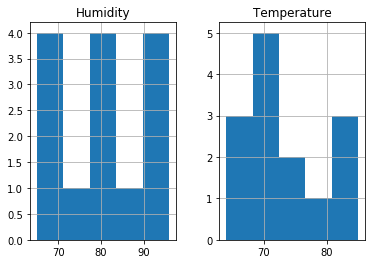

In [337]:
df.hist(['Temperature','Humidity'],bins=5);

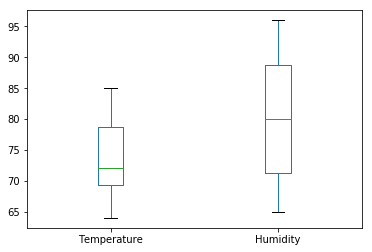

In [338]:
df[['Temperature','Humidity']].plot(kind='box');

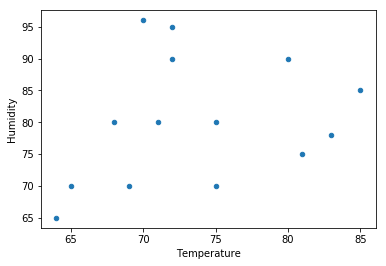

In [340]:
# plot everything
df.plot('Temperature', 'Humidity', kind='scatter');

In [342]:
# we can iterate through the groups with the same Outlook
groups=df.groupby('Outlook')
for name, group in groups:
    print(name)

overcast
rain
sunny


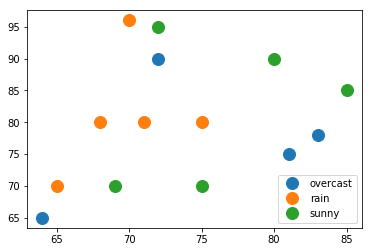

In [343]:
# we can plot multiple times on the same plot, so let's use this group iteration
# to make three overlapping scatter plots:
fig, ax = plt.subplots()

ax.margins(0.05)
for name, group in groups:
    ax.plot(group.Temperature, group.Humidity, marker='o', linestyle='', ms=12, label=name)
ax.legend(numpoints=1, loc='lower right')

plt.show()

## Bonus: pivot table

* Left as an exercise to the reader. [BART rider pair data](http://64.111.127.166/origin-destination/) is fun.
* Or maybe do as an in-class exercise in the impossible event of extra time.